In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def plot_radar_chart(data, title="", color_palette = ['#BAE8E1', '#B0BFFE', '#FFDFFC', '#FF9EB3']):
    '''
    Plots a radar (spider) chart.

    Args:
        - data (pd.DataFrame): A dataframe that its rows will be the radar circular points (metrics), and columns are the legends.

    Returns:
        None    
    '''
    # Get the metrics (df rows)
    metrics = data.index.tolist()

    theta = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
    
    # Title
    ax.set_title(title, y=1.15, fontsize=20) if title != "" else None

    # Direction of the zero angle to the north (upwards)
    ax.set_theta_zero_location("N")

    # Direction of the angles to be counterclockwise
    ax.set_theta_direction(-1)

    # Radial label position (position of values on the radial axes)
    ax.set_rlabel_position(90)

    # Make radial gridlines appear behind other elements
    ax.spines['polar'].set_zorder(1)

    # Color of radial girdlines
    ax.spines['polar'].set_color('lightgrey')

    
    for idx, (series_name, series) in enumerate(data.items()):
        values = series.tolist()
        values = values + [values[0]]

        # plots the lines
        ax.plot(theta, values, linewidth=1.75, linestyle='solid', label=series_name, marker='o', markersize=7, color=color_palette[idx % len(color_palette)])
    
        # This fills the areas
        ax.fill(theta, values, alpha=0.50, color=color_palette[idx % len(color_palette)], zorder=0)

    plt.yticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"], color="black", size=11, zorder=10)
    plt.xticks(theta, metrics + [metrics[0]], color='black', size=11.5, zorder=10)

    # # Redraw y-ticks on top
    # for label in ax.get_yticklabels():
    #     label.set_zorder(10)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11.5)


Analyzing different LLMs performance as text encoders

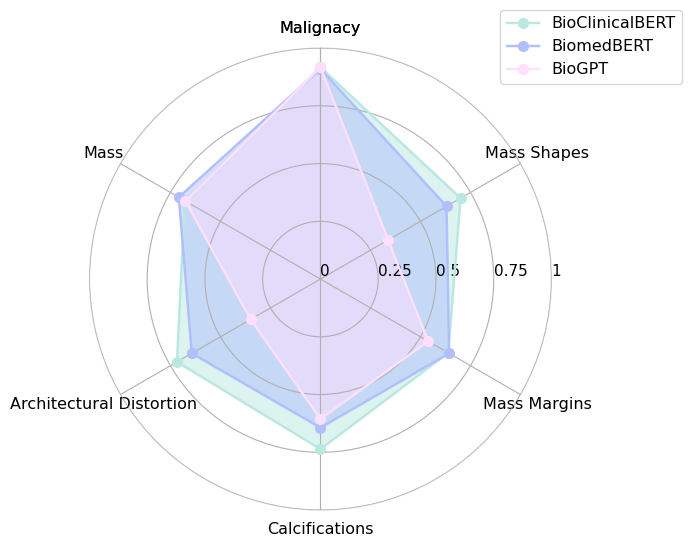

In [10]:
data = pd.DataFrame([[0.9164, 0.9096, 0.9167], 
                     [0.7004, 0.6302, 0.3384], 
                     [0.6389, 0.6432, 0.5382], 
                     [0.7362, 0.6433, 0.6054], 
                     [0.7172, 0.6433, 0.3491], 
                     [0.6784, 0.7080, 0.6747]],
                     index=["Malignacy", "Mass Shapes", "Mass Margins", "Calcifications", "Architectural Distortion", "Mass"],
                     columns=["BioClinicalBERT", "BiomedBERT", "BioGPT"]
                     )

data

# LLMS
plot_radar_chart(data=data)

Analyzing different vision encoders performance as image encoders

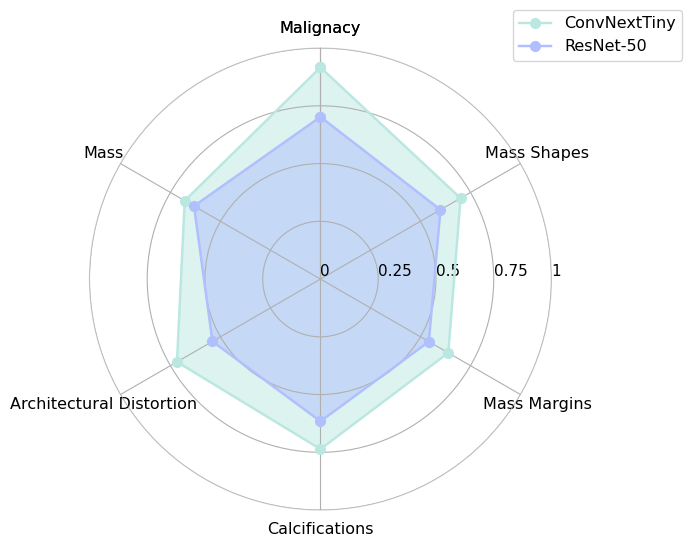

In [11]:
data = pd.DataFrame([[0.9164, 0.7021], 
                     [0.7004, 0.5999], 
                     [0.6389, 0.5419], 
                     [0.7362, 0.6159], 
                     [0.7172, 0.5399], 
                     [0.6784, 0.6321]],
                     index=["Malignacy", "Mass Shapes", "Mass Margins", "Calcifications", "Architectural Distortion", "Mass"],
                     columns=["ConvNextTiny", "ResNet-50"]
                     )

data

# image encoders
plot_radar_chart(data=data)

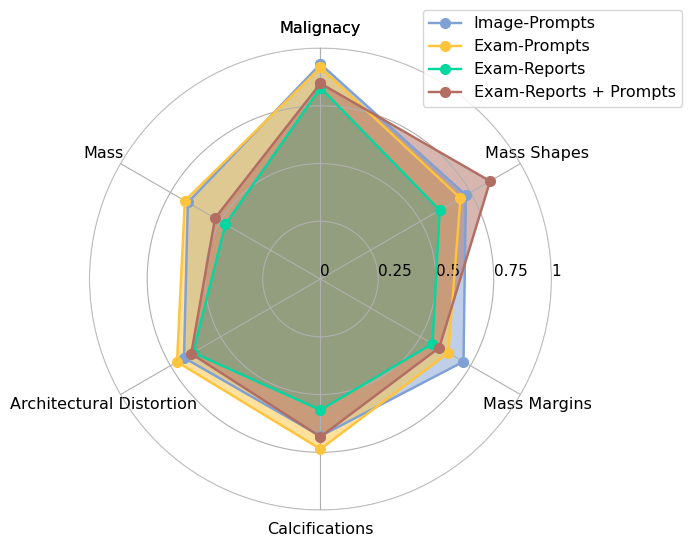

In [76]:
data = pd.DataFrame([[0.931,0.916, 0.828, 0.847], 
                     [0.727,0.700, 0.596, 0.848], 
                     [0.715,0.639, 0.560, 0.594], 
                     [0.680,0.736, 0.567, 0.683], 
                     [0.682,0.717, 0.637, 0.646], 
                     [0.663,0.678, 0.475, 0.527]],
                     index=["Malignacy", "Mass Shapes", "Mass Margins", "Calcifications", "Architectural Distortion", "Mass"],
                     columns=["Image-Prompts", "Exam-Prompts", "Exam-Reports", "Exam-Reports + Prompts",]
                     )

data

# image encoders
plot_radar_chart(data=data, color_palette=['#80A1D4', '#FFC43D', '#06D6A0', '#B26E63'])

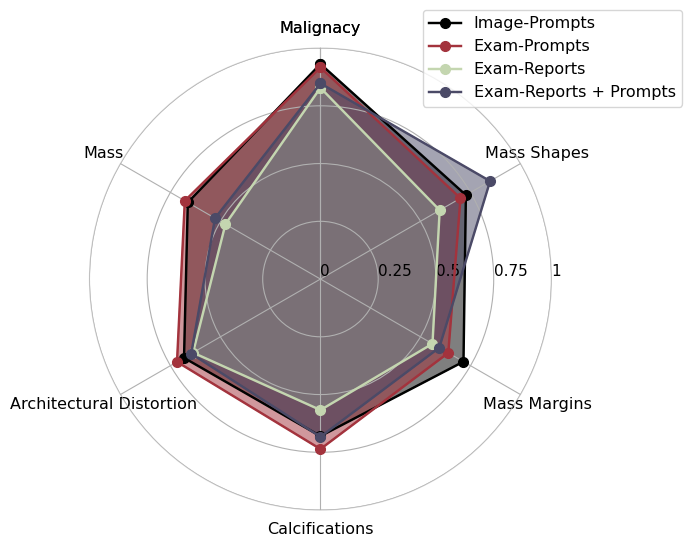

In [13]:
data = pd.DataFrame([[0.931,0.916, 0.828, 0.847], 
                     [0.727,0.700, 0.596, 0.848], 
                     [0.715,0.639, 0.560, 0.594], 
                     [0.680,0.736, 0.567, 0.683], 
                     [0.682,0.717, 0.637, 0.646], 
                     [0.663,0.678, 0.475, 0.527]],
                     index=["Malignacy", "Mass Shapes", "Mass Margins", "Calcifications", "Architectural Distortion", "Mass"],
                     columns=["Image-Prompts", "Exam-Prompts", "Exam-Reports", "Exam-Reports + Prompts",]
                     )

data

# image encoders
plot_radar_chart(data=data, color_palette=['#000100', '#A3333D', '#C4D6B0', '#4B4A67'])